# LEAF CORN CLASSIFICATION PROJECT

# Import Library

In [ ]:
!pip install -U --no-cache-dir tensorflowjs h5py


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import json
import os
import io



In [1]:
SEED = 59
IMG_SIZE = 224
BATCH = 32
DATA_DIR = "/content/drive/MyDrive/corn leaf diseases.v1i.folder"

# Data Loading

In [2]:
TRAINING_DIR = "/content/drive/MyDrive/corn leaf diseases.v1i.folder/train"
VALIDATION_DIR = "/content/drive/MyDrive/corn leaf diseases.v1i.folder/valid"
TEST_DIR = "/content/drive/MyDrive/corn leaf diseases.v1i.folder/test"

# Data Preprocessing

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 2931 images belonging to 4 classes.


In [9]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

Found 836 images belonging to 4 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

Found 419 images belonging to 4 classes.


# Train Model

In [11]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

/tmp/ipython-input-4091729002.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 6,354,628 (24.24 MB)

 Trainable params: 4,096,644 (15.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
num_epochs = 30

optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
H = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 769s 8s/step - accuracy: 0.6780 - loss: 3.4659 - val_accuracy: 0.8720 - val_loss: 0.3177
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8624 - loss: 0.3694 - val_accuracy: 0.8158 - val_loss: 0.4921
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8778 - loss: 0.3299 - val_accuracy: 0.8923 - val_loss: 0.2942
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8800 - loss: 0.3304 - val_accuracy: 0.9055 - val_loss: 0.2515
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8860 - loss: 0.2813 - val_accuracy: 0.8983 - val_loss: 0.2610
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9131 - loss: 0.2306 - val_accuracy: 0.9055 - val_loss: 0.2384
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9062 - loss: 0.2344 - val_accuracy: 0.9187 - val_loss: 0.2410
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9031 - loss: 0.2470 - val_accuracy: 0.8935 - v

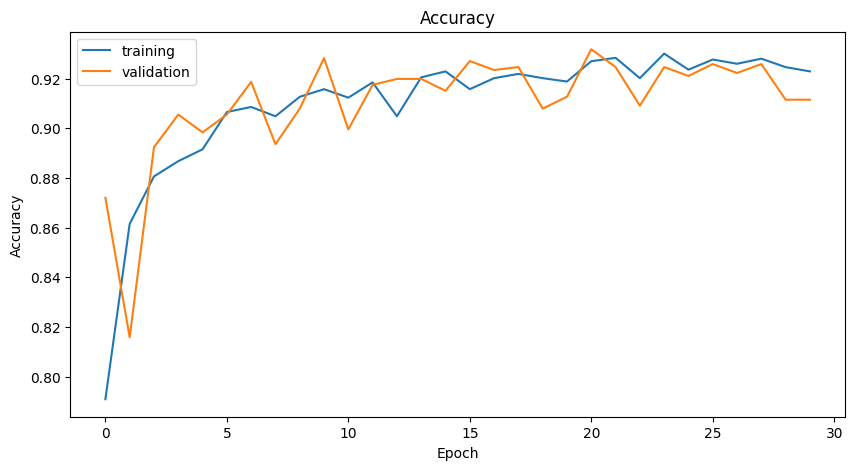

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


# Konversi Model

In [30]:
from google.colab import drive
drive.mount('/content/drive')
BASE = '/content/drive/MyDrive/Corn_Leaf_Project'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
model.save(f"{BASE}/best.keras")

In [34]:
# Simpan model dalam format SavedModel (direkomendasikan untuk konversi)
model.export('/content/saved_model')  # Keras 3 + TF 2.20

# Buat label.txt sesuai urutan indeks
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
labels = [idx_to_class[i] for i in range(len(idx_to_class))]
with open(f'{BASE}/label.txt', 'w') as f:
    f.write('\n'.join(labels))

labels


Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')]
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134746764503248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764503824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764506512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764506128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764504976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764506704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764505168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764507280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764506896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134746764504784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1347

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [36]:
!tensorflowjs_converter --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  --signature_name=serving_default --saved_model_tags=serve \
  /content/saved_model \
  "$BASE/tfjs_model"


2025-10-06 04:52:08.550351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759726328.583817   26624 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759726328.597208   26624 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759726328.631056   26624 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759726328.631116   26624 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759726328.631121   26624 computation_placer.cc:177] computation placer alr

In [37]:
!ls -lh "$BASE/tfjs_model"


total 25M
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard1of7.bin
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard2of7.bin
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard3of7.bin
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard4of7.bin
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard5of7.bin
-rw------- 1 root root 4.0M Oct  6 04:52 group1-shard6of7.bin
-rw------- 1 root root  75K Oct  6 04:52 group1-shard7of7.bin
-rw------- 1 root root 110K Oct  6 04:52 model.json


In [38]:
!cp -r "/content/drive/MyDrive/Corn_Leaf_Project/tfjs_model" /content/
!cp "/content/drive/MyDrive/Corn_Leaf_Project/label.txt" /content/


In [23]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import tensorflow as tf, keras
print("TF:", tf.__version__)
print("Keras:", keras.__version__)


TF: 2.20.0
Keras: 3.11.3
